___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Guilherme Leite

## Gabriel Brey

## Leonardo Neves

___

___

## INTRODUÇÃO

A indústria cinematográfica é umas das maiores do mercado de entretenimento, movimentando bilhões de dólares anualmente, com alguns filmes recentes com orçamentos de até 400 milhões de dólares, o objetivo do projeto é estimar o rendimento de um filme em relação a época do ano que é lançado e seu orçamento.

A base de dados contém informações de aproximadamente 5000 filmes do site TMDB, que concentra vários dados sobre a produção, gênero, entre outros de peças cinematográficas.


___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

Os dados que serão utilizados serão o revenue, budget e release date. O revenue se refere a quanto o filme faturou em todo o mundo em dólares americanos, o budget é referente ao orçamento do filme, também em dólares americanos e o release date é a data de lançamento mundial no formato dia/mês/ano

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Desktop\Insper\2018\DPCD\DPCD\Projeto3


### BASE DE DADOS

In [3]:
tmdb = pd.read_csv('tmdb_5000_movies.csv', encoding='latin1')#Abre o dataframe inteiro

data = tmdb[['revenue','budget','release_date']]#Separa as colunas
data = data[~(data == 0).any(axis=1)] #remove filmes que tenham, algum dos dados igual a 0
nndf = data[pd.notnull(data.revenue)&pd.notnull(data.budget)]#Tira os "NaN" do df
nndf = nndf.reset_index(drop=True)#Reseta o index dos filmes

In [4]:
for i in range (len(nndf)): #Deixa a data de lançamento como só o mes envez de DD/MM/YYYY
    Str = str(nndf.release_date[i])	
    SStr = Str.split('-')
    nndf.release_date[i] = SStr[1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### ANÁLISE DESCRITIVA

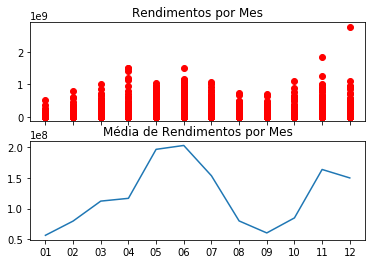

In [5]:
f, axarr = plt.subplots(2, sharex=True)

Y = nndf['revenue']
X = nndf[['release_date']]
axarr[0].plot(X,Y,'ro')
axarr[0].set_title('Rendimentos por Mes')

X2  = ['01','02','03','04','05','06','07','08','09','10','11','12',]
Y2 = [nndf.loc[nndf['release_date'] == '01'].mean()[0],nndf.loc[nndf['release_date'] == '02'].mean()[0],
nndf.loc[nndf['release_date'] == '03'].mean()[0],nndf.loc[nndf['release_date'] == '04'].mean()[0],
nndf.loc[nndf['release_date'] == '05'].mean()[0],nndf.loc[nndf['release_date'] == '06'].mean()[0],
nndf.loc[nndf['release_date'] == '07'].mean()[0],nndf.loc[nndf['release_date'] == '08'].mean()[0],
nndf.loc[nndf['release_date'] == '09'].mean()[0],nndf.loc[nndf['release_date'] == '10'].mean()[0],
nndf.loc[nndf['release_date'] == '11'].mean()[0],nndf.loc[nndf['release_date'] == '12'].mean()[0]]
axarr[1].plot(X2,Y2)
axarr[1].set_title('Média de Rendimentos por Mes')

plt.show()

Os gráficos acima mostram como o revenue dos filmes ocorre nos meses do ano, é possível perceber que os meses de Maio, Junho , Julho, Novembro tem um maior rendimento médio.

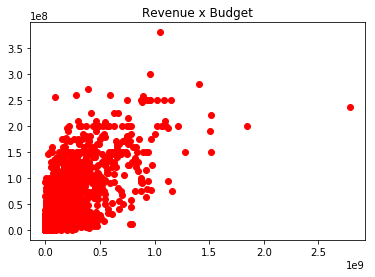

In [6]:
plt.plot(nndf['revenue'],nndf['budget'],'ro')
plt.title('Revenue x Budget')
plt.show()

Como é possível perber pelo gráfico, existe algum tipo de relação linear entre o Budget e o Revenue dos filmes

___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

In [7]:
x = len (nndf)
nndf.sample(frac=1)# Aleatoriza o index de cada filme
DfTrain = nndf.iloc[:int(0.8*x)]# separa os filmes de 75% primeiros filmes como Treinamento
DfTrain = DfTrain.reset_index(drop=True)#Reseta o index dos filmes
DfTest = nndf.iloc[int(0.8*x):]# separa os filmes de 25% últimos filmes como Teste
DfTest = DfTest.reset_index(drop=True)#Reseta o index dos filmes

print("Valores para o dataframe de treinamento\n",DfTrain.describe())
print("\nValores para o dataframe de teste\n",DfTest.describe())

Valores para o dataframe de treinamento
             revenue        budget
count  2.583000e+03  2.583000e+03
mean   1.451585e+08  4.984335e+07
std    2.000253e+08  4.515839e+07
min    1.100000e+01  1.000000e+01
25%    3.000000e+07  2.000000e+07
50%    7.600000e+07  3.500000e+07
75%    1.730301e+08  6.500000e+07
max    2.787965e+09  3.800000e+08

Valores para o dataframe de teste
             revenue        budget
count  6.460000e+02  6.460000e+02
mean   2.561785e+07  3.913064e+06
std    4.573668e+07  3.304603e+06
min    5.000000e+00  1.000000e+00
25%    2.476444e+06  1.500000e+06
50%    9.600000e+06  3.500000e+06
75%    2.697209e+07  6.000000e+06
max    4.001765e+08  3.500000e+07


As médias e desvios padrão para ambos os dataframes são muito próximos, dessa forma, é possível dizer que ambos tem as mesmas características e serão menos suscetíveis a overfitting e underfitting.  

In [8]:
from sklearn import linear_model
from sklearn import metrics
import numpy as np
import statsmodels.api as sm
from sklearn import datasets

X = DfTrain[['release_date','budget']].round(0).astype(int)
X = X.values.reshape((len(X),2))
Y = DfTrain['revenue'].round(0).astype(int)
Y = Y.values.reshape((len(Y),1))

XTest = DfTest[['release_date','budget']].round(0).astype(int)
XTest = XTest.values.reshape((len(XTest),2))
YTest = DfTest['revenue'].round(0).astype(int)
YTest = YTest.values.reshape((len(YTest),1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Predição pela media 

In [9]:
media = DfTrain.revenue.mean()

S =  (DfTrain.revenue-media)**2
ss = S.sum()
RMS = (ss/len( DfTrain.revenue))**(1/2)

print(media)
print("RMS da Predição pela media:", RMS)

145158488.51761517
RMS da Predição pela media: 199986591.9880134


MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression):

In [10]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit() 
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     1022.
Date:                Fri, 01 Jun 2018   Prob (F-statistic):               0.00
Time:                        23:28:26   Log-Likelihood:                -52228.
No. Observations:                2583   AIC:                         1.045e+05
Df Residuals:                    2580   BIC:                         1.045e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.971e+06   7.34e+06     -0.813      0.416   -2.04e+07    8.43e+06
x1          8.259e+05   8.52e+05      0.969      0.333   -8.45e+05     2.5e+06
x2             2.8823      0.064     45.188      0.000       2.757       3.007
==============================================================================
Omnibus:                      920.267   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88585.217
Skew:                           0.716   Prob(JB):                         0.00
Kurtosis:                      31.654   Cond. No.                     1.72e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
XTest = sm.add_constant(XTest)
predictions = model.predict(XTest)
YTest - predictions

array([[ 1.46667648e+07],
       [ 8.13563631e+06],
       [ 5.92990881e+07],
       [-2.45505953e+07],
       [-2.75355573e+06],
       [-1.44286037e+06],
       [-4.53425687e+05],
       [ 1.10973713e+07],
       [ 1.67575806e+07],
       [-1.05732169e+06],
       [-1.01978250e+07],
       [-1.55435903e+07],
       [ 5.04312868e+07],
       [-1.29382149e+07],
       [-1.02612854e+07],
       [-2.13395718e+07],
       [-8.04864929e+06],
       [-2.14195146e+07],
       [-1.63778850e+07],
       [-1.73241417e+07],
       [ 3.89438428e+07],
       [-2.03643599e+07],
       [-1.99330534e+07],
       [-2.40947942e+07],
       [-1.85901355e+07],
       [-1.85959412e+07],
       [-1.86863062e+07],
       [-2.23159540e+07],
       [-6.28078981e+07],
       [-2.33279557e+07],
       [ 1.80055146e+06],
       [ 1.20235589e+08],
       [ 1.59197523e+07],
       [ 4.59594373e+06],
       [ 7.23527826e+06],
       [ 2.19103824e+06],
       [-2.03434448e+07],
       [-9.56245788e+05],
       [-1.8

In [12]:
len(predictions);len(YTest)


646

In [13]:


lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)
predictions


array([[6.87046000e+08],
       [8.62849396e+08],
       [7.08452523e+08],
       ...,
       [1.67000589e+07],
       [2.20431785e+07],
       [2.53469647e+07]])

___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS

https://www.kaggle.com/tmdb/tmdb-movie-metadata - Acessado em 25/05/2018

https://www.themoviedb.org/?language=en - Acessado em 25/05/2018

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html - 
Acessado em 28/05/2018

http://scikit-learn.org/stable/modules/linear_model.html Acessado em 28/05/2018

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/  - Acessado em 25/05/2018

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate - Acessado em 27/05/2018